# Loan Eligibility Prediction [Logistic Regression]

## Importing libraries

In [23]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# For preprocessing the visualization
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

# For splitting the dataset into train and test
from sklearn.model_selection import train_test_split

# ML Models used for Classification 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## Importing Dataset
- dataset is stored in variable 'data'.

In [24]:
data = pd.read_csv("LoanApprovalPrediction.csv")

## Loading Dataset

In [25]:
# Print first 5 elements
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Data Preprocessing and Visualization

In [26]:
obj = (data.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 7


### Finding Categorical Data
- There are 7 categorical data columns.
- Loan_ID is *unique* and not correlated with any of the other column.
- Loan_Status is the target variable.


In [27]:
# Print the dimentions of the dataset
data.shape

(598, 13)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [29]:
# To find the number of columns with  
# datatype==object 
obj = (data.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 7


In [30]:
# Identify categorical columns (assuming they are of object type)
categorical_columns = data.select_dtypes(include=['object']).columns

# Print the categorical data
data[categorical_columns]


,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,Graduate,No,Urban,Y
1,LP001003,Male,Yes,Graduate,No,Rural,N
2,LP001005,Male,Yes,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,Not Graduate,No,Urban,Y
4,LP001008,Male,No,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
593,LP002978,Female,No,Graduate,No,Rural,Y
594,LP002979,Male,Yes,Graduate,No,Rural,Y
595,LP002983,Male,Yes,Graduate,No,Urban,Y
596,LP002984,Male,Yes,Graduate,No,Urban,Y


### Dropping Loan_ID
- Loan_ID is unique and not correlated with any of the other column.

In [31]:
# Dropping Loan_ID column 
data.drop(['Loan_ID'],axis=1,inplace=True)

### Visualize the unique values

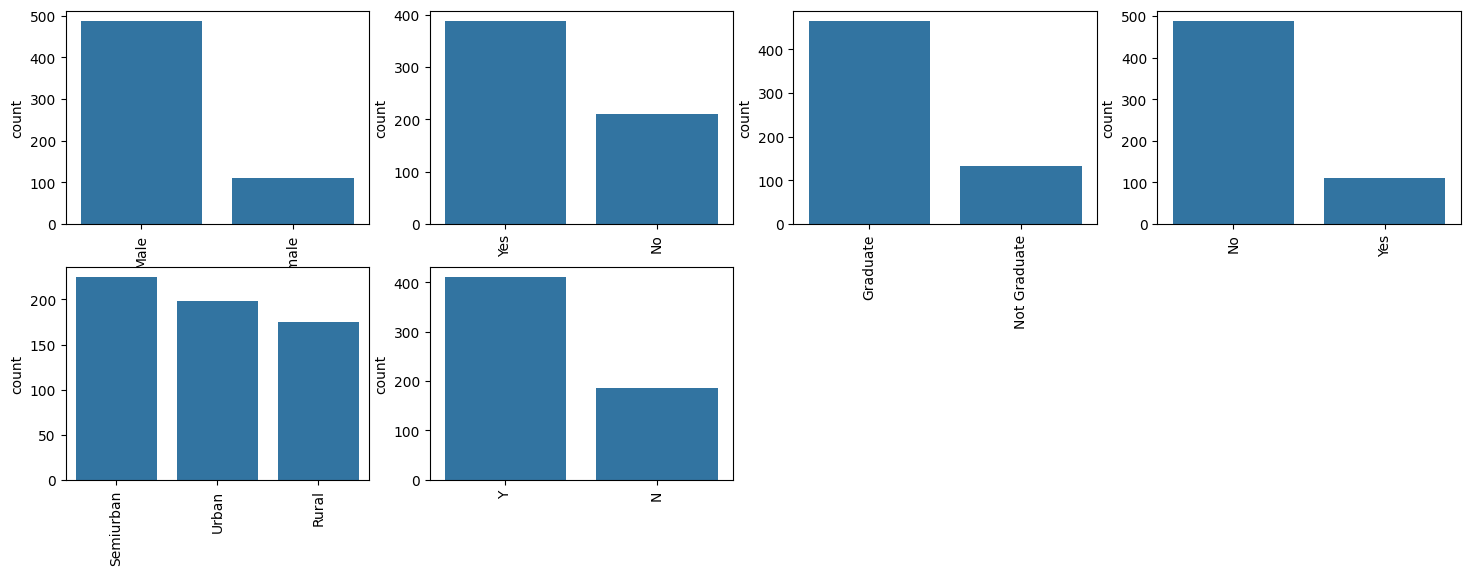

In [32]:
obj = (data.dtypes == 'object') 
object_cols = list(obj[obj].index) 
plt.figure(figsize=(18,36)) 
index = 1
  
for col in object_cols: 
  y = data[col].value_counts() 
  plt.subplot(11,4,index) 
  plt.xticks(rotation=90) 
  sns.barplot(x=list(y.index), y=y) 
  index +=1

### Using Label Encoder
- Changes all the values from 'binary' to 'int'

In [33]:
# Import label encoder 
# from sklearn import preprocessing
    
# label_encoder object knows how  
# to understand word labels.

label_encoder = preprocessing.LabelEncoder() 
obj = (data.dtypes == 'object') 
for col in list(obj[obj].index): 
  data[col] = label_encoder.fit_transform(data[col])

In [34]:
# To find the number of columns with  
# datatype==object 
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


### Heatmap
- Show correlation between 'Loan Amount' and 'ApplicantIncome'.
- Shows that 'Credit_History' has a high impact on 'Loan_Status'.

<Axes: >

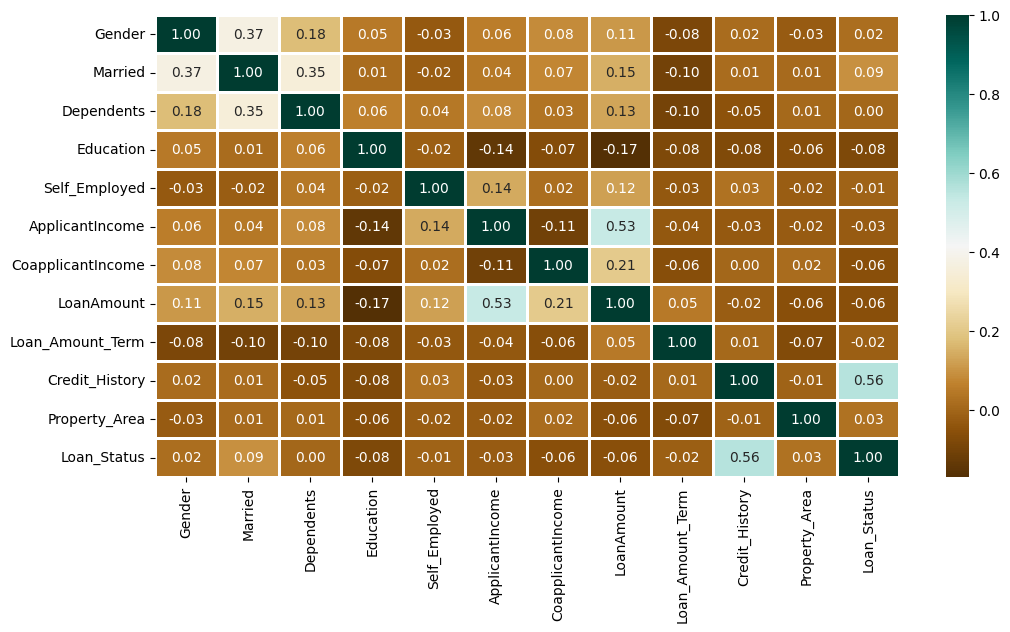

In [35]:
plt.figure(figsize=(12,6)) 
  
sns.heatmap(data.corr(),cmap='BrBG',fmt='.2f', 
            linewidths=2,annot=True)

### Using 'Catplot'
- Visualize the plot for the 'Gender' & 'Marital Status' of the applicant.

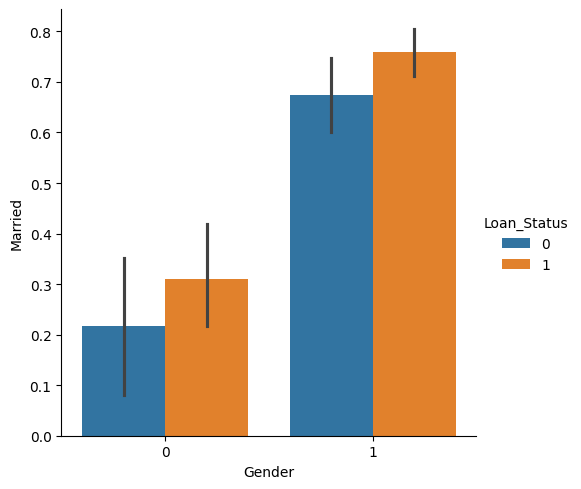

In [36]:
sns.catplot(x="Gender", y="Married", 
            hue="Loan_Status",  
            kind="bar",  
            data=data)

### Finding  missing values in the dataset

In [37]:
for col in data.columns: 
  data[col] = data[col].fillna(data[col].mean())  
    
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Splitting Dataset
- Splitting the dataset into training & testing datasets.

In [38]:
# from sklearn.model_selection import train_test_split 

# Data without Loan_Status (Target Varible) column
X = data.drop(['Loan_Status'],axis=1) 

# Loan_Status (Target Varible) column
Y = data['Loan_Status'] 
X.shape,Y.shape 
  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.7, random_state=1) 
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((179, 11), (419, 11), (179,), (419,))

## Model Training and Testing

### Importing Models 
- Logistic Regression


In [39]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression


lc  = LogisticRegression(max_iter = 10000)
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators = 7,criterion = 'entropy',random_state =7)
svc = SVC(probability = True)

### Fitting Models on the TRAINING SET: 

In [40]:
# Training models on the training set using [ clf.fit(X_train, Y_train) ]
for clf_train in (knn,rfc,lc,svc):
    clf_train.fit(X_train, Y_train)

## Confusion Matrix

| - | NO | YES |
| :---: | :---: | :---: |
| NO | True Negative | False Positive |
| YES | False Negative | True Positive |




#### Confusion Matrix on Training Data

[Training]


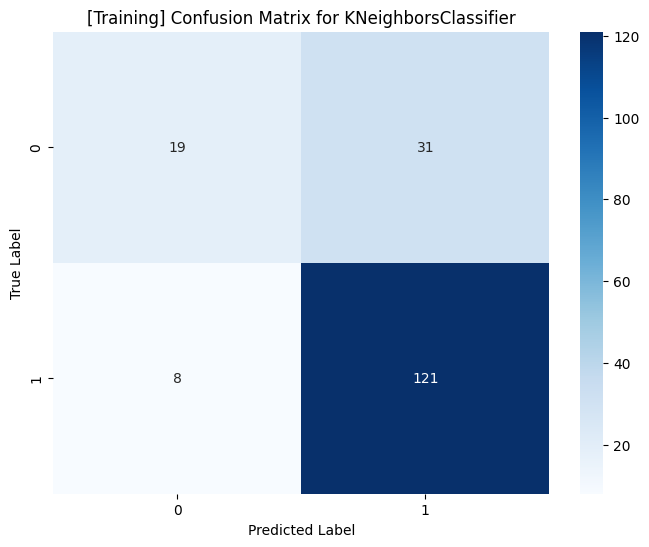

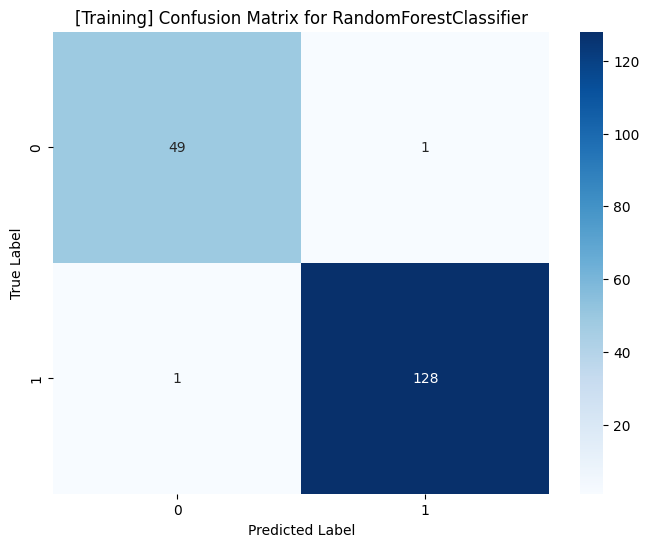

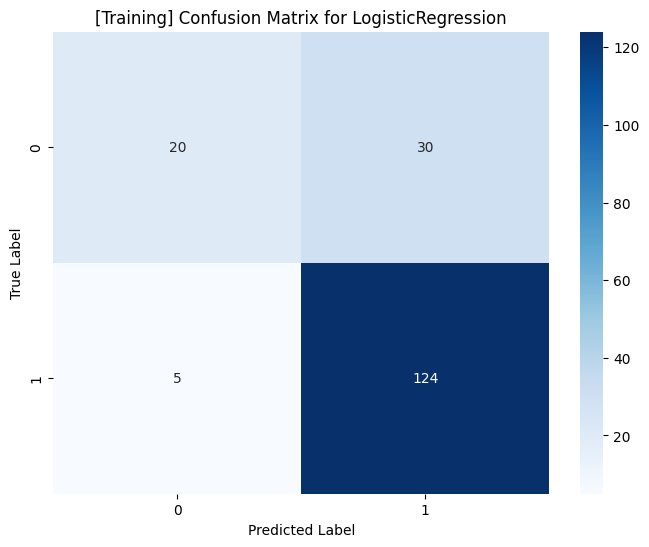

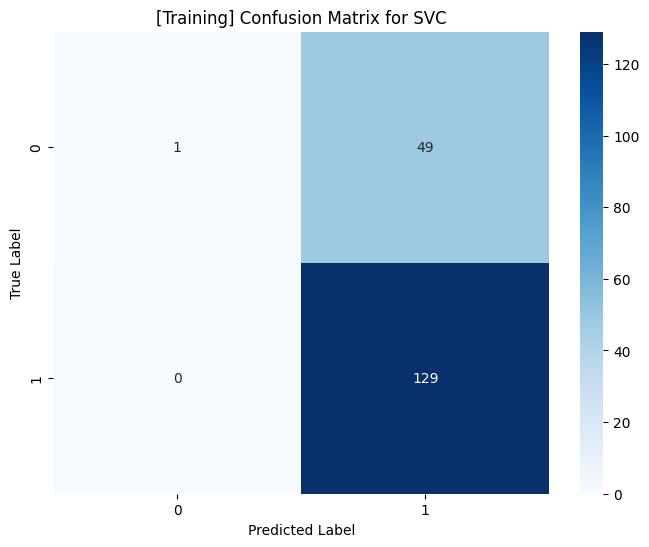

--------------------------------------------------------------------------------------------------------------------
[Testing]


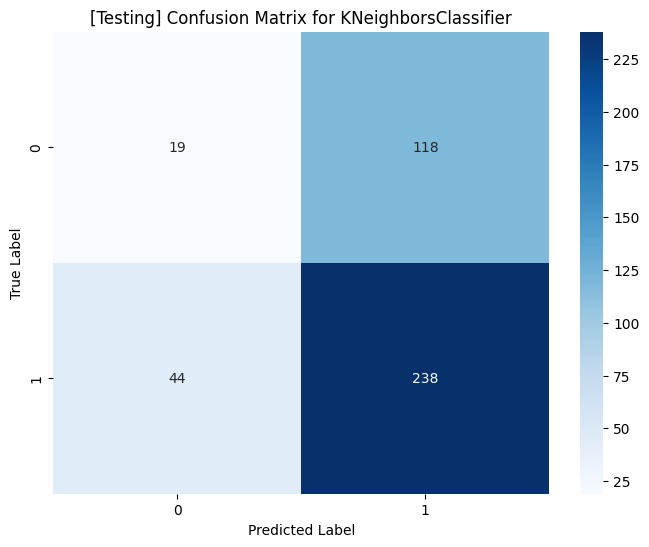

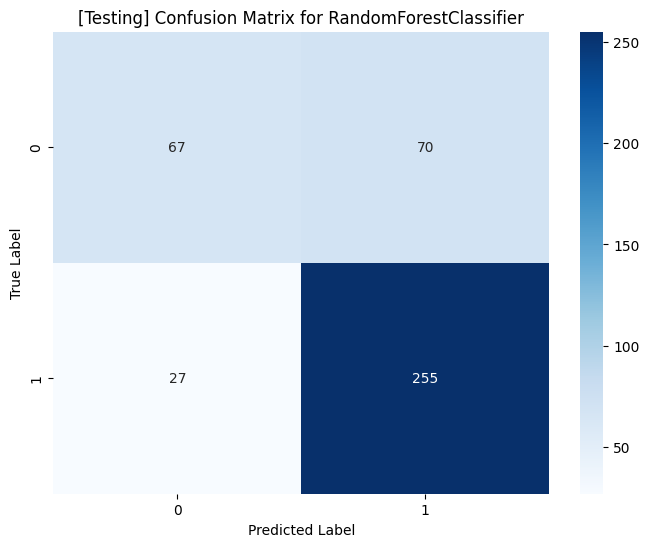

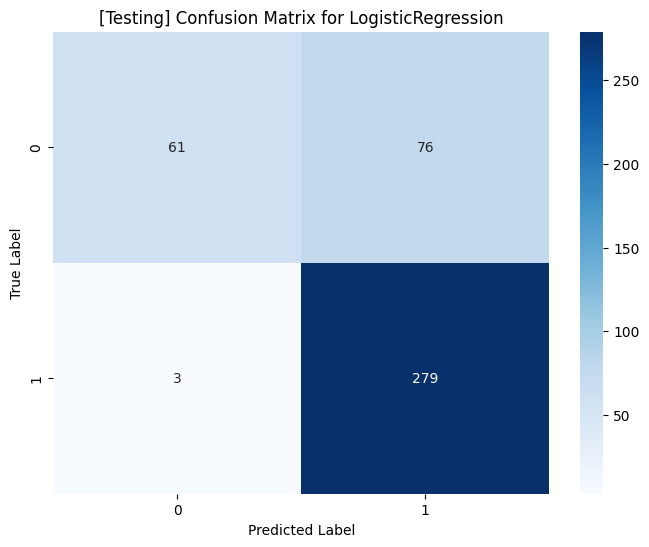

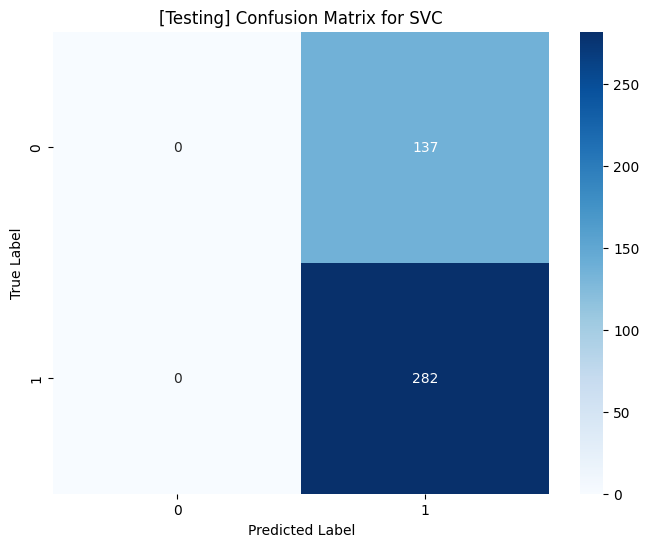

In [41]:
# from sklearn.metrics import confusion_matrix
# from sklearn import metrics

print("[Training]")
models = [knn,rfc,lc,svc]

for model in models:
  
  # Get predictions                     
  Y_pred_train = model.predict(X_train)

  # Confusion Matrix
  cm_train = confusion_matrix(Y_train, Y_pred_train)

  # Plotting the confusion matrix
  plt.figure(figsize=(8,6))
  sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues")
  plt.title('[Training] Confusion Matrix for ' + model.__class__.__name__)
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()
  
print("--------------------------------------------------------------------------------------------------------------------")

print("[Testing]")
models = [knn,rfc,lc,svc]

for model in models:
  
  # Get predictions                     
  Y_pred_test = model.predict(X_test)

  # Confusion Matrix
  cm_test = confusion_matrix(Y_test, Y_pred_test)

  # Plotting the confusion matrix
  plt.figure(figsize=(8,6))
  sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
  plt.title('[Testing] Confusion Matrix for ' + model.__class__.__name__)
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()

### Accuracy Score

In [42]:
# from sklearn import metrics

print("[Training]")
models = [knn,rfc,lc,svc]
for model in models:
  
  # Get predictions                     
  Y_pred_train = model.predict(X_train)
    
  # Accuracy Score [Training]
  print("Accuracy score of",model.__class__.__name__,"=",100*metrics.accuracy_score(Y_train,Y_pred_train))

print("--------------------------------------------------------------------------------------------------------------------")

print("[Testing]")
models = [knn,rfc,lc,svc]
for model in models:
  
  # Get predictions                     
  Y_pred_test = model.predict(X_test)
    
  # Accuracy Score [Training]
  print("Accuracy score of",model.__class__.__name__,"=",100*metrics.accuracy_score(Y_test,Y_pred_test))



[Training]
Accuracy score of KNeighborsClassifier = 78.2122905027933
Accuracy score of RandomForestClassifier = 98.88268156424581
Accuracy score of LogisticRegression = 80.44692737430168
Accuracy score of SVC = 72.62569832402235
--------------------------------------------------------------------------------------------------------------------
[Testing]
Accuracy score of KNeighborsClassifier = 61.336515513126486
Accuracy score of RandomForestClassifier = 76.84964200477327
Accuracy score of LogisticRegression = 81.14558472553699
Accuracy score of SVC = 67.30310262529832


### F1 Score

In [43]:
# from sklearn import metrics

print("[Training]")
models = [knn,rfc,lc,svc]
for model in models:
  
  # Get predictions                     
  Y_pred_train = model.predict(X_train)
    
  # F1 Score [Training]
  print("F1 score of",model.__class__.__name__,"=",100*metrics.f1_score(Y_train,Y_pred_train))

print("--------------------------------------------------------------------------------------------------------------------")

print("[Testing]")
models = [knn,rfc,lc,svc]
for model in models:
  
  # Get predictions                     
  Y_pred_test = model.predict(X_test)
    
  # F1 Score [Testing]
  print("F1 score of",model.__class__.__name__,"=",100*metrics.f1_score(Y_test,Y_pred_test))



[Training]
F1 score of KNeighborsClassifier = 86.12099644128114
F1 score of RandomForestClassifier = 99.2248062015504
F1 score of LogisticRegression = 87.63250883392226
F1 score of SVC = 84.03908794788273
--------------------------------------------------------------------------------------------------------------------
[Testing]
F1 score of KNeighborsClassifier = 74.60815047021944
F1 score of RandomForestClassifier = 84.01976935749587
F1 score of LogisticRegression = 87.59811616954474
F1 score of SVC = 80.4564907275321


### ROC Curve

[Training]


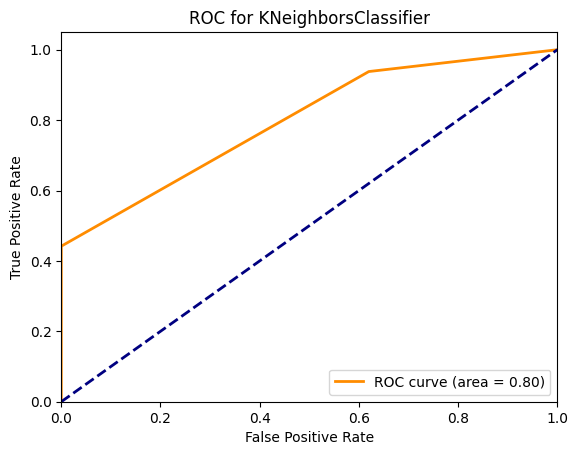

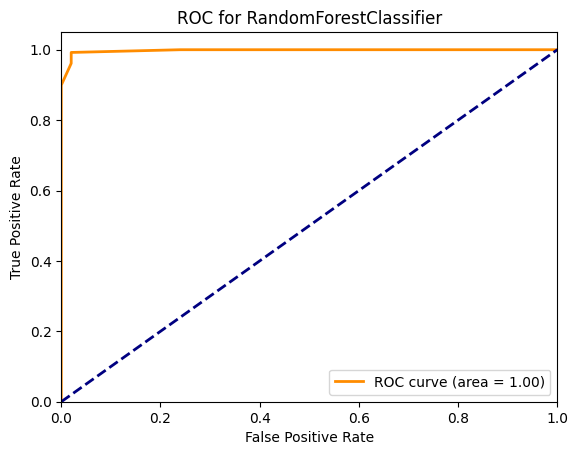

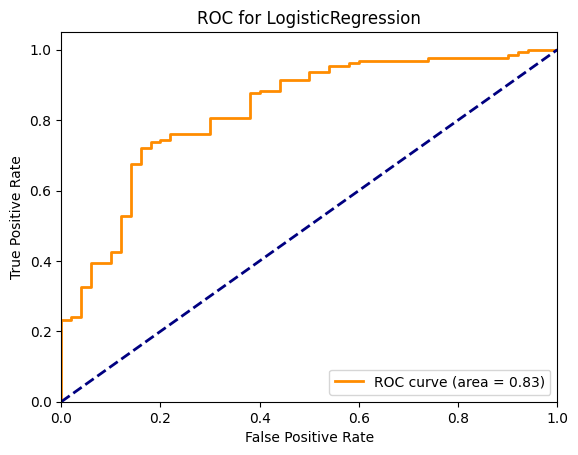

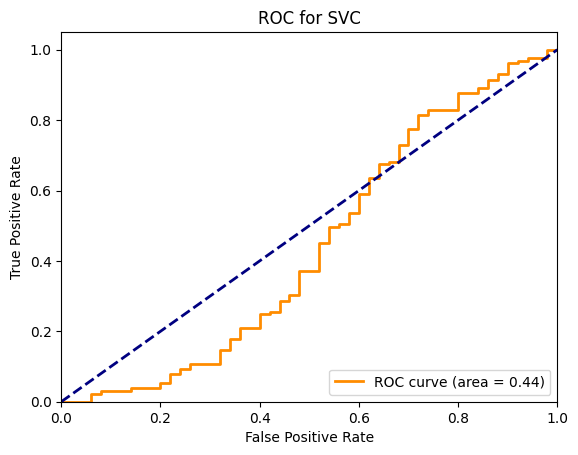

--------------------------------------------------------------------------------------------------------------------
[Testing]


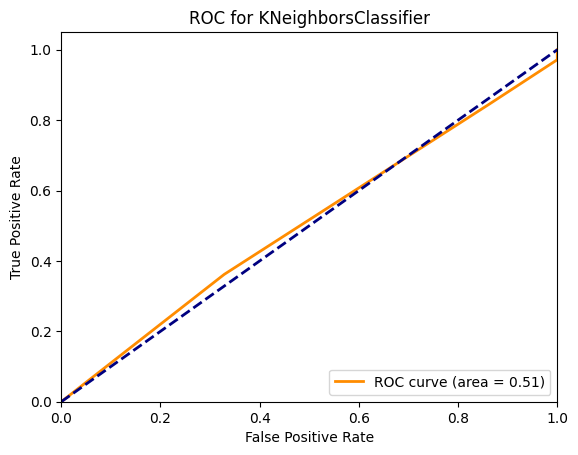

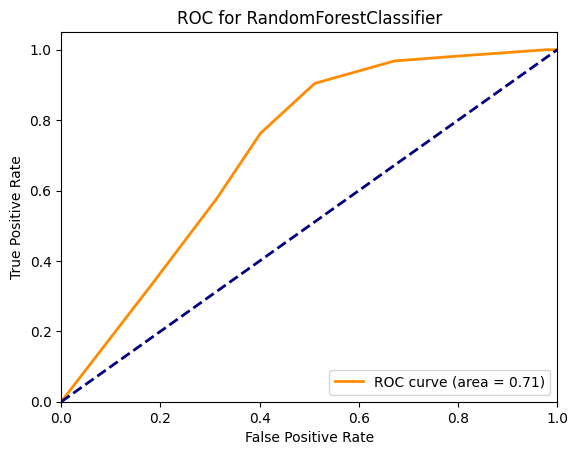

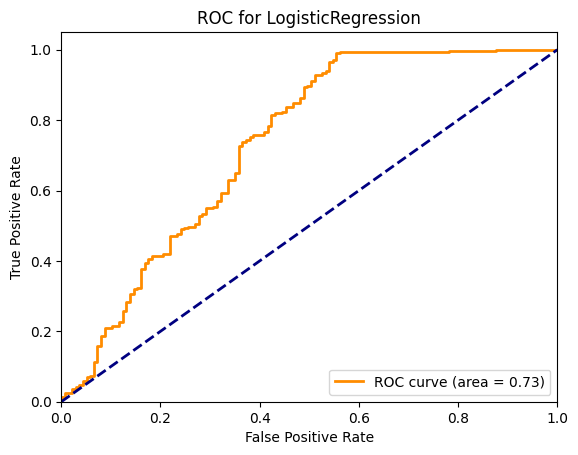

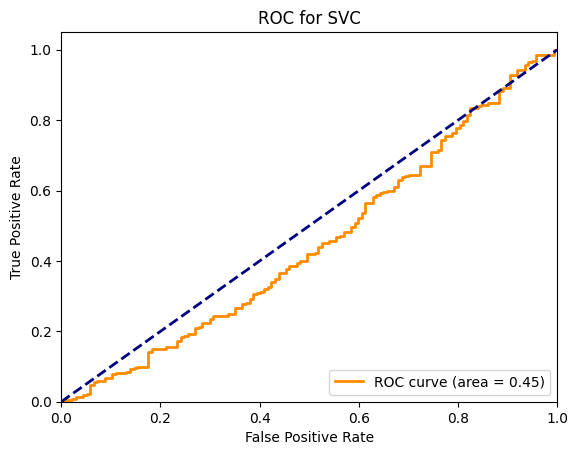

In [44]:
# from sklearn.metrics import roc_curve, auc
# from sklearn import metrics

print("[Training]")
models = [knn,rfc,lc,svc]

for model in models:
  
  # Get predictions                     
  Y_pred_train = model.predict(X_train)

  # Probability of positive class
  Y_prob_train = model.predict_proba(X_train)[:, 1]
    
  # Compute ROC curve and ROC area for each class
  fpr, tpr, thresholds = roc_curve(Y_train, Y_prob_train)
  roc_auc_train = auc(fpr, tpr)

  # Plotting the ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_train)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC for ' + model.__class__.__name__)
  plt.legend(loc="lower right")
  plt.show()

print("--------------------------------------------------------------------------------------------------------------------")


print("[Testing]")
models = [knn,rfc,lc,svc]

for model in models:
  
  # Get predictions                     
  Y_pred_test = model.predict(X_test)

  # Probability of positive class
  Y_prob_test = model.predict_proba(X_test)[:, 1]
    
  # Compute ROC curve and ROC area for each class
  fpr, tpr, thresholds = roc_curve(Y_test, Y_prob_test)
  roc_auc_test = auc(fpr, tpr)

  # Plotting the ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC for ' + model.__class__.__name__)
  plt.legend(loc="lower right")
  plt.show()